In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(2)

# given - build model
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

Using TensorFlow backend.


In [2]:
# build fib sequence
s_1 = 1
s_2 = 2
num_its = 10
sequence = []
sequence.append(s_1)
sequence.append(s_2)
for k in range(num_its):
    s_t_1 = sequence[-1]
    s_t_2 = sequence[-2]
    s_t = s_t_1 + s_t_2
    sequence.append(s_t)

In [3]:
# build fib sequence
s_1 = 1
num_its = 100
sequence = []
sequence.append(s_1)
for k in range(num_its):
    s_t_1 = sequence[-1]
    s_t = s_t_1 + 2
    sequence.append(s_t)

In [4]:

### TODO: fill out the function below that transforms the input series and window-size into a set of input/output pairs for use with our RNN model
def window_transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    
    # window data
    count = 0
    for t in range(len(series) - window_size):
        # get input sequence
        temp_in = series[t:t + window_size]
        X.append(temp_in)
        
        # get corresponding target
        temp_target = series[t + window_size]
        y.append(temp_target)
        count+=1
        
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),)
    
    return X,y

In [5]:
window_size = 1
X,y = window_transform_series(sequence,window_size=window_size)

In [6]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

In [7]:
# TODO: build an RNN to perform regression on our time series input/output data
model = Sequential()
model.add(Dense(1, input_dim=window_size, activation='linear'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer,use_bias=False)

In [8]:
# run your model!
model.fit(X_train, y_train, nb_epoch=100, batch_size=2, verbose=0)

/Users/Nurgetson/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:1938: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


In [166]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [152]:
# self.testing_predictions = []
# y_input = self.series[self.train_test_split:self.train_test_split + self.window_size]
# y_input = list(y_input)
# y_input = [v[0] for v in y_input]
# for t in range(test_periods):            
#     y_input = np.asarray(y_input)
#     y_input.shape = (1,len(y_input))

#     # compute and store prediction
#     pred = model.predict(y_input)
#     self.testing_predictions.append(pred[0])

#     # kick out last entry in y_input and insert most recent prediction at front
#     y_input = y_input[0,1:]
#     y_input = np.append(y_input,pred)

NameError: name 'train_predict' is not defined

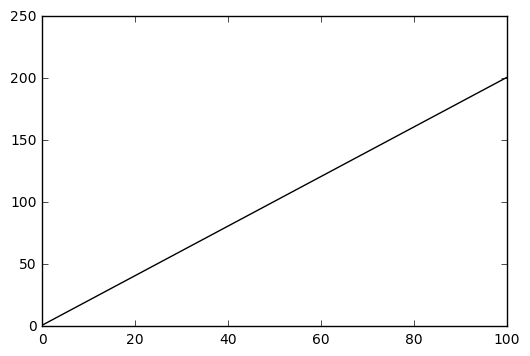

In [9]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(sequence,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [10]:
model.get_weights()

[array([[-0.69533741]], dtype=float32),
 array([-0.8191905], dtype=float32),
 array([[-1.43820262]], dtype=float32),
 array([ 0.81931329], dtype=float32)]

In [1]:
1.07366598*0.93138474

0.9999961096291452

In [3]:
1.07366598*0.96084827

1.0316300994408545